In [0]:
#import the required library
import warnings 
warnings.filterwarnings('ignore',category=FutureWarning)

import pandas as pd
import numpy as np

## data visualization library
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
# MNIST dataset downloaded from Kaggle : 
#https://www.kaggle.com/c/digit-recognizer/data

copied_path='drive/My Drive/Dimensionality reduction/mnist_train.csv'
data=pd.read_csv(copied_path)

In [29]:
###check the data 
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
### size of data 
print(data.shape)

(42000, 785)


In [0]:
###separate the feature and label
Y=data['label']
X=data.drop('label',axis=1)

In [8]:
print("size of class label :",Y.shape)
print("size of feature :",X.shape)

size of class label : (42000,)
size of feature : (42000, 784)


## Dimensionality reduction algorithm:
- It is a process of reducing the random variable which are adding less value or have less spread .
- Here we will see implemeantation of the techniques for dimensionality reduction in scikit learn python library:

###  Principal component analysis(PCA):
- PCA for data visualization(we cant see 784 dimensions data so converted to 2d)
   

In [34]:
### Standardizing the data 
from sklearn.preprocessing import StandardScaler
standard_x=StandardScaler().fit_transform(X)
print(standard_x.shape)

(42000, 784)


In [0]:
##intializing the pca
from sklearn.decomposition import PCA

In [11]:
# configuring the parameters
# the number of components = 2

pca=PCA(n_components=2)
new_data=pca.fit_transform(standard_x)
print(new_data.shape)

(42000, 2)


In [12]:
##appending the label
new_data= np.column_stack((new_data,Y)) 
new_data=pd.DataFrame(data=new_data,columns=('1st_principal','2nd_principal','label'))
new_data.head()

,1st_principal,2nd_principal,label
0,-5.140370,-5.224787,1.0
1,19.292380,6.033942,0.0
2,-7.644567,-1.706464,1.0
3,-0.474176,5.836004,4.0
4,26.559629,6.025832,0.0


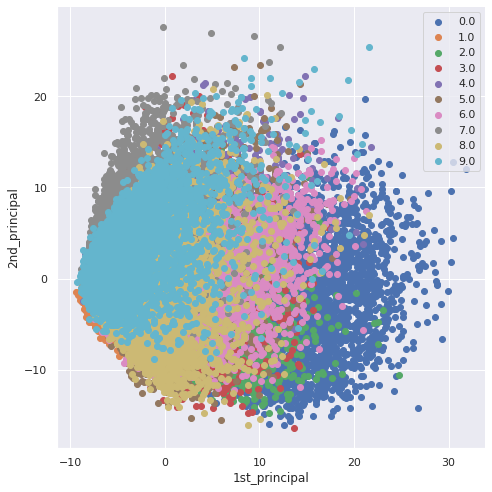

In [13]:
####scattter plot to see the relationship between this 2 features
sns.set()
ax=sns.FacetGrid(new_data,hue='label',height=7)
ax.map(plt.scatter,'1st_principal','2nd_principal')
plt.legend()
plt.show()

### Observations:
- Pca is not performing well ,as above plot shows,able to split 0 and 7 digit only others are still overlab 
- Now the point is how to choose d value that i will retain maximum varience 

In [14]:
###train pca for all 784 dimensions

pca=PCA(n_components=784)
new_data=pca.fit_transform(standard_x)
print(new_data.shape)

(42000, 784)


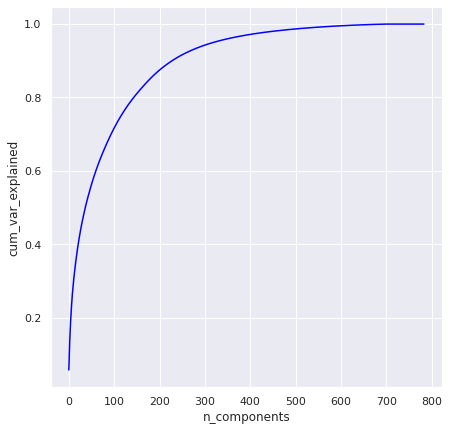

In [15]:
### cummulative plot for how much percentage varience is retaining with corresponding features 
percentage_var_explained=pca.explained_variance_/np.sum(pca.explained_variance_)
cum_var_explained=np.cumsum(percentage_var_explained)

plt.figure(figsize=(7,7))
plt.plot(cum_var_explained, c='blue')
plt.xlabel('n_components')
plt.ylabel('cum_var_explained')
plt.show()

### Obersations:
- Now we choose how much variance we want based on number of n_components
- If we want to retain 95% information ,choose n_components=350(around)

### t-Distributed Stochastic Neighbor Embedding(t-SNE) using Scikit-learn
- AS we saw pca is not performing good to visualize 784 dimension data to 2 dimension ,Basically pca focus to preserve global space of the data(direction) not on the local structure
- t-SNE preserve the local space of the points which are close to each other
- t-SNE try to embed that for every d-dim points there is point in d' dim(d'<d) 

#### How to apply t-SNE

In [0]:
  from sklearn.manifold import TSNE

In [17]:
model=TSNE(random_state=0)
##configuring parameters
# default number of components(n_components)=2
# default perplexity(no of neighbours)=30
# default learning_rate=200
# default maximum number of iterations for the optimization(n_iter)=1000

print(model)

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=0, verbose=0)


In [0]:
tsne_data=model.fit_transform(standard_x)


In [19]:
# creating a new data which help in the plotting the result 
tsne= np.column_stack((tsne_data,Y)) 
tsne_df=pd.DataFrame(data=tsne,columns=('1st_principal','2nd_principal','label'))
tsne_df.head()


,1st_principal,2nd_principal,label
0,-42.807545,-34.290771,1.0
1,11.887651,49.380413,0.0
2,-61.311356,1.497591,1.0
3,19.977028,-59.474567,4.0
4,18.462320,57.007645,0.0


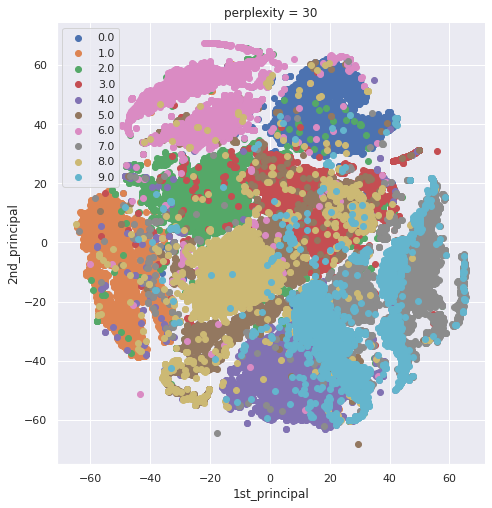

In [20]:
####scattter plot to see the relationship between this 2 features
sns.set()
ax=sns.FacetGrid(tsne_df,hue='label',height=7)
ax.map(plt.scatter,'1st_principal','2nd_principal')
plt.title("perplexity = 30")
plt.legend()
plt.show()

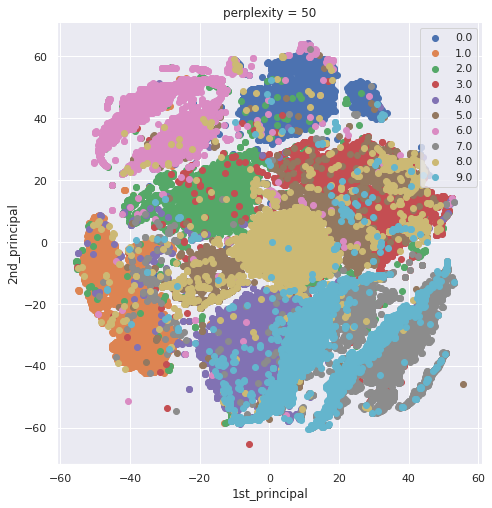

In [21]:
### training t-SNE on different perplexity=50
model=TSNE(n_components=2,perplexity=50,random_state=0)
tsne_data=model.fit_transform(standard_x)

# creating a new data which help in the plotting the result 
tsne= np.column_stack((tsne_data,Y)) 
tsne_df=pd.DataFrame(data=tsne,columns=('1st_principal','2nd_principal','label'))

####scattter plot to see the relationship between this 2 features
sns.set()
ax=sns.FacetGrid(tsne_df,hue='label',height=7)
ax.map(plt.scatter,'1st_principal','2nd_principal')
plt.title("perplexity = 50")
plt.legend()
plt.show()



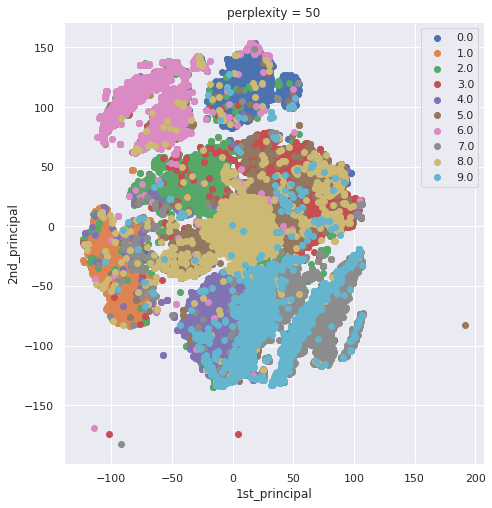

In [22]:
### training t-SNE on different perplexity=50 and number of iterations=5000
model=TSNE(n_components=2,perplexity=50,random_state=0,n_iter=5000)
tsne_data=model.fit_transform(standard_x)

# creating a new data which help in the plotting the result 
tsne= np.column_stack((tsne_data,Y)) 
tsne_df=pd.DataFrame(data=tsne,columns=('1st_principal','2nd_principal','label'))

####scattter plot to see the relationship between this 2 features
sns.set()
ax=sns.FacetGrid(tsne_df,hue='label',height=7)
ax.map(plt.scatter,'1st_principal','2nd_principal')
plt.title("perplexity = 50")
plt.legend()
plt.show()


In [0]:
# Picking the top 1000 points as TSNE takes a lot of time 360k pomits
standard_x_1000= standard_x[0:1000,:]
labels= Y[0:1000]

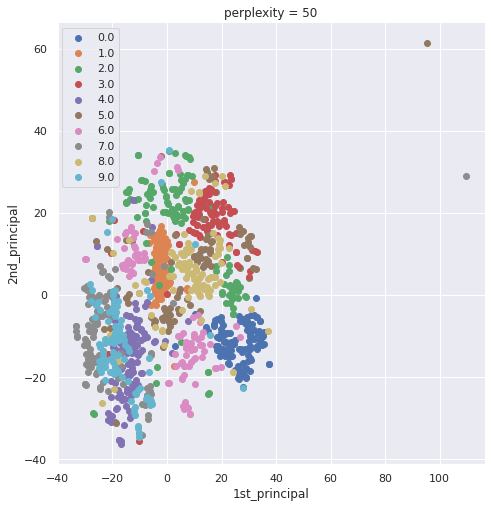

In [53]:
### training t-SNE
model=TSNE(n_components=2,perplexity = 50,random_state=0,n_iter=1000)
tsne_data=model.fit_transform(standard_x_1000)

# creating a new data which help in the plotting the result 
tsne= np.column_stack((tsne_data,labels)) 
tsne_df=pd.DataFrame(data=tsne,columns=('1st_principal','2nd_principal','label'))

####scattter plot to see the relationship between this 2 features
sns.set()
ax=sns.FacetGrid(tsne_df,hue='label',height=7)
ax.map(plt.scatter,'1st_principal','2nd_principal')
plt.title("perplexity = 50")
plt.legend()
plt.show()
